## Import Libraries

In [239]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import FootballDB as fdb

ModuleNotFoundError: No module named 'sklearn'

## Load Data

In [148]:
# Load dataframe
db = fdb.LoadDB()
fduk = fdb.LoadTbl(db,'football-data-uk')
df = fdb.LoadDframe(fduk)
# Convert datatypes
## Date
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,errors='ignore')
## Numeric
num_cols = ['FTAG','FTHG','AC','AF','AR','AS','AST','AY','HC','HF','HR','HS','HST','HTAG','HTHG','HY']
for c in num_cols:
    df[c] = pd.to_numeric(df[c])
df.dtypes

AwayTeam            object
Date        datetime64[ns]
Div                 object
FTAG               float64
FTHG               float64
FTR                 object
HomeTeam            object
Source              object
Season              object
AC                 float64
AF                 float64
AR                 float64
AS                 float64
AST                float64
AY                 float64
HC                 float64
HF                 float64
HR                 float64
HS                 float64
HST                float64
HTAG               float64
HTHG               float64
HTR                 object
HY                 float64
Referee             object
dtype: object

In [149]:
df.info

<bound method DataFrame.info of           AwayTeam       Date Div  FTAG  FTHG FTR    HomeTeam  \
0          Chester 1996-08-17  E3   1.0   2.0   H    Brighton   
1           Barnet 1996-08-17  E3   0.0   1.0   H   Cambridge   
2       Hartlepool 1996-08-17  E3   2.0   0.0   A  Colchester   
3         Carlisle 1996-08-17  E3   1.0   0.0   A   Doncaster   
4         Hereford 1996-08-17  E3   0.0   1.0   H      Fulham   
...            ...        ...  ..   ...   ...  ..         ...   
62298       Fulham 2008-05-11  E0   1.0   0.0   A  Portsmouth   
62299      Arsenal 2008-05-11  E0   1.0   0.0   A  Sunderland   
62300    Liverpool 2008-05-11  E0   2.0   0.0   A   Tottenham   
62301  Aston Villa 2008-05-11  E0   2.0   2.0   D    West Ham   
62302   Man United 2008-05-11  E0   2.0   0.0   A       Wigan   

                 Source Season    AC  ...   HC    HF   HR    HS   HST  HTAG  \
0      football-data-uk   9697   NaN  ...  NaN   NaN  NaN   NaN   NaN   NaN   
1      football-data-uk   969

## Clean Data

In [150]:
missing_df = df
missing_df.groupby('Season').first()

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,AC,AF,...,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
Season,,,,,,,,,,,,,,,,,,,,,
0001,Norwich,2000-08-12,E1,0.0,1.0,H,Barnsley,football-data-uk,3.0,13.0,...,1.0,8.0,1.0,13.0,4.0,0.0,0.0,D,1.0,Phil Richards
0102,Torquay,2001-08-11,E3,0.0,1.0,H,Bristol Rvs,football-data-uk,1.0,12.0,...,7.0,9.0,0.0,17.0,6.0,0.0,0.0,D,0.0,R. D. Furnandiz
0203,Bournemouth,2002-08-10,E3,2.0,2.0,D,Boston,football-data-uk,5.0,12.0,...,3.0,14.0,0.0,5.0,2.0,1.0,0.0,A,3.0,A Kaye
0304,Everton,2003-08-16,E0,1.0,2.0,H,Arsenal,football-data-uk,9.0,15.0,...,6.0,8.0,1.0,11.0,5.0,0.0,1.0,H,1.0,M Halsey
0405,Southampton,2004-08-14,E0,0.0,2.0,H,Aston Villa,football-data-uk,6.0,9.0,...,12.0,14.0,0.0,14.0,5.0,0.0,2.0,H,0.0,U Rennie
0506,Burnley,2005-08-06,E1,1.0,2.0,H,Crewe,football-data-uk,9.0,14.0,...,8.0,9.0,0.0,16.0,8.0,0.0,1.0,H,2.0,C Webster
0607,Chesterfield,2006-08-05,E2,3.0,0.0,A,Bournemouth,football-data-uk,6.0,15.0,...,4.0,11.0,0.0,6.0,1.0,0.0,0.0,D,2.0,P Taylor
0708,Exeter,2007-08-11,EC,4.0,1.0,A,Altrincham,football-data-uk,8.0,17.0,...,4.0,11.0,0.0,7.0,4.0,0.0,1.0,H,0.0,C Pawson
0809,Oxford,2008-08-08,EC,0.0,3.0,H,Barrow,football-data-uk,5.0,14.0,...,7.0,13.0,0.0,14.0,3.0,0.0,0.0,D,0.0,P Quinn


In [151]:
# Keep Seasons from 0001-1819
valid_seasons = ['0001','0102','0203','0304','0405','0506','0607','0708','0809','0910','1011','1112','1213','1314'\
                 ,'1415','1516','1617','1718','1819']
# Keep results from div E0, E1
valid_div = ['E0','E1']
# Filter dataframe
missing_df = df
missing_df = missing_df[missing_df['Season'].isin(valid_seasons)]
missing_df = missing_df[missing_df['Div'].isin(valid_div)]
#missing_df = missing_df.drop(labels='Referee',axis=1)
df = missing_df # Set filtered dataframe
# Missing data
missing_df = missing_df[missing_df.isna().max(axis=1)] 
missing_df # Show missing data

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,...,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
11284,Huddersfield,2012-08-17,E1,0.0,1.0,H,Cardiff,football-data-uk,1213,4.0,...,7.0,11.0,0.0,13.0,5.0,0.0,0.0,D,1.0,NaN
11285,Middlesbrough,2012-08-18,E1,0.0,1.0,H,Barnsley,football-data-uk,1213,3.0,...,11.0,9.0,0.0,16.0,9.0,0.0,1.0,H,3.0,NaN
11286,Charlton,2012-08-18,E1,1.0,1.0,D,Birmingham,football-data-uk,1213,7.0,...,3.0,9.0,0.0,14.0,7.0,0.0,0.0,D,0.0,NaN
11287,Bolton,2012-08-18,E1,0.0,2.0,H,Burnley,football-data-uk,1213,9.0,...,7.0,10.0,0.0,14.0,7.0,0.0,1.0,H,1.0,NaN
11288,Watford,2012-08-18,E1,3.0,2.0,A,Crystal Palace,football-data-uk,1213,4.0,...,4.0,10.0,0.0,4.0,2.0,1.0,2.0,H,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11832,Cardiff,2013-05-04,E1,2.0,2.0,D,Hull,football-data-uk,1213,5.0,...,6.0,15.0,0.0,16.0,12.0,0.0,0.0,D,2.0,NaN
11833,Leicester,2013-05-04,E1,3.0,2.0,A,Nott'm Forest,football-data-uk,1213,11.0,...,4.0,5.0,0.0,13.0,9.0,2.0,1.0,A,1.0,NaN
11834,Middlesbrough,2013-05-04,E1,0.0,2.0,H,Sheffield Weds,football-data-uk,1213,2.0,...,5.0,14.0,0.0,9.0,4.0,0.0,2.0,H,0.0,NaN
11835,Leeds,2013-05-04,E1,2.0,1.0,A,Watford,football-data-uk,1213,2.0,...,4.0,9.0,1.0,15.0,8.0,1.0,1.0,D,3.0,NaN


In [152]:
# Impute missing data with mean values
impute_df = df
impute_vals = impute_df.groupby(['Div','FTR','Season']).mean().reset_index()
impute_vals['HTR']=impute_vals['FTR']
impute_vals['Referee']='Unknown'
impute_vals # Show impute vals

,Div,FTR,Season,FTAG,FTHG,AC,AF,AR,AS,AST,...,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HTR,Referee
0,E0,A,0001,2.136842,0.463158,4.631579,14.094737,0.042105,10.400000,5.642105,...,6.115789,13.252632,0.126316,10.778947,4.421053,0.989474,0.221053,1.789474,A,Unknown
1,E0,A,0102,2.333333,0.614035,4.447368,14.052632,0.096491,10.140351,5.394737,...,6.184211,13.122807,0.122807,10.763158,4.403509,1.000000,0.280702,1.438596,A,Unknown
2,E0,A,0203,2.252427,0.563107,5.184466,12.805825,0.038835,10.699029,6.165049,...,6.427184,12.533981,0.097087,11.699029,5.854369,0.970874,0.281553,1.495146,A,Unknown
3,E0,A,0304,2.200000,0.552381,4.847619,13.295238,0.057143,11.095238,6.457143,...,6.533333,12.676190,0.133333,12.371429,6.485714,1.009524,0.295238,1.609524,A,Unknown
4,E0,A,0405,2.123711,0.546392,4.979381,13.731959,0.072165,11.329897,6.422680,...,5.546392,12.659794,0.144330,10.659794,5.546392,0.783505,0.257732,1.144330,A,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,E1,H,1415,0.609649,2.469298,5.105263,11.377193,0.105263,12.109649,3.377193,...,5.785088,10.719298,0.039474,15.460526,5.907895,0.258772,1.122807,1.315789,H,Unknown
110,E1,H,1516,0.484581,2.251101,4.638767,11.533040,0.083700,10.876652,3.176211,...,5.546256,10.903084,0.017621,14.770925,5.488987,0.207048,0.951542,1.374449,H,Unknown
111,E1,H,1617,0.583969,2.305344,4.763359,12.034351,0.175573,11.076336,3.251908,...,5.339695,11.877863,0.022901,14.251908,5.354962,0.244275,0.973282,1.553435,H,Unknown
112,E1,H,1718,0.500000,2.273109,4.852941,12.218487,0.134454,10.945378,2.886555,...,5.399160,11.848739,0.029412,14.336134,5.512605,0.226891,1.071429,1.478992,H,Unknown


In [153]:
impute_df = df
# Function: replace missing values with impute values
#tmp = impute_df.loc[missing_df.index[0]]
#tmp.fillna(impute_vals[(impute_vals['Div']==tmp['Div']) & (impute_vals['FTR']==tmp['FTR']) & (impute_vals['Season']==tmp['Season']
#)].iloc[0])
#impute_df.loc[missing_df.index].apply(lambda x: x.fillna(value=impute_vals.loc[x['Div'],x['FTR']]))
impute_df.loc[missing_df.index]=impute_df.loc[missing_df.index].apply(lambda x: x.fillna(impute_vals[(impute_vals['Div']==x['Div']) & (impute_vals['FTR']==x['FTR']) & (impute_vals['Season']==x['Season'])].iloc[0]),axis=1)
df = impute_df
df # show final dataframe

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,...,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
728,Aston Villa,2015-08-08,E0,1.0,0.0,A,Bournemouth,football-data-uk,1516,3.0,...,6.0,13.0,0.0,11.0,2.0,0.0,0.0,D,3.0,M Clattenburg
729,Swansea,2015-08-08,E0,2.0,2.0,D,Chelsea,football-data-uk,1516,8.0,...,4.0,15.0,1.0,11.0,3.0,1.0,2.0,H,1.0,M Oliver
730,Watford,2015-08-08,E0,2.0,2.0,D,Everton,football-data-uk,1516,2.0,...,8.0,7.0,0.0,10.0,5.0,1.0,0.0,A,1.0,M Jones
731,Sunderland,2015-08-08,E0,2.0,4.0,H,Leicester,football-data-uk,1516,3.0,...,6.0,13.0,0.0,19.0,8.0,0.0,3.0,H,2.0,L Mason
732,Tottenham,2015-08-08,E0,0.0,1.0,H,Man United,football-data-uk,1516,2.0,...,1.0,12.0,0.0,9.0,1.0,0.0,1.0,H,2.0,J Moss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62298,Fulham,2008-05-11,E0,1.0,0.0,A,Portsmouth,football-data-uk,0708,6.0,...,5.0,13.0,0.0,15.0,10.0,0.0,0.0,D,0.0,M Clattenburg
62299,Arsenal,2008-05-11,E0,1.0,0.0,A,Sunderland,football-data-uk,0708,4.0,...,3.0,14.0,0.0,13.0,5.0,1.0,0.0,A,1.0,K Stroud
62300,Liverpool,2008-05-11,E0,2.0,0.0,A,Tottenham,football-data-uk,0708,4.0,...,8.0,11.0,0.0,6.0,3.0,0.0,0.0,D,1.0,U Rennie
62301,Aston Villa,2008-05-11,E0,2.0,2.0,D,West Ham,football-data-uk,0708,8.0,...,7.0,9.0,0.0,16.0,8.0,1.0,1.0,D,2.0,M Dean


In [154]:
# Check for missing data
missing_df = df
missing_df = missing_df[missing_df.isna().max(axis=1)] 
missing_df # Show missing data

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,...,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee


## Feature Engineering

In [255]:
# Import libraries
from sklearn.preprocessing import OneHotEncoder

In [225]:
# Helper Functions
# Previous matches
def prev_n_matches(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Filter date
    df = df[(df['Date']<date)]
    # Filter team
    if homeaway == 'home':
        team_mask = df['HomeTeam']==team # Home team ONLY
    elif homeaway == 'away': 
        team_mask = df['AwayTeam']==team # Away team ONLY
    else:
        team_mask = (df['HomeTeam']==team) | (df['AwayTeam']==team) # BOTH home and away
    df = df[team_mask]
    # Order by desc date
    df = df.sort_values(by='Date',ascending=False)
    # Return n results
    if n>0:
        df=df.iloc[range(n)] # Return first n rows
    else:
        next # Return all
    return df

# Win or loss
def team_win_loss(teamName,homeTeam,awayTeam,FTR):
    if ((teamName==homeTeam) & (FTR=='H')) | ((teamName==awayTeam) & (FTR=='A')):
        return 'W'
    elif ((teamName==homeTeam) & (FTR=='A')) | ((teamName==awayTeam) & (FTR=='H')):
        return 'L'
    else:
        return 'D'

# Previous results
def prev_n_results(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Get previous n matches
    df = prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway)
    # Return results
    return list(df.apply(lambda x: team_win_loss(team,homeTeam=x['HomeTeam'],awayTeam=x['AwayTeam'],FTR=x['FTR']),axis=1))

# Number of wins in previous results
def prev_n_win(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    results = prev_n_results(df,team=team,n=n,date=date,homeaway=homeaway)
    return sum([r=='W' for r in results])

# Number of losses in previous results
def prev_n_loss(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    results = prev_n_results(df,team=team,n=n,date=date,homeaway=homeaway)
    return sum([r=='L' for r in results])

# Number of draws in previous results
def prev_n_draw(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    results = prev_n_results(df,team=team,n=n,date=date,homeaway=homeaway)
    return sum([r=='D' for r in results])

# Win percentage in previous results
def prev_n_win_pct(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    nwins = prev_n_win(df,team=team,n=n,date=date,homeaway=homeaway)
    return nwins/n

# Loss percentage in previous results
def prev_n_loss_pct(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    nloss = prev_n_loss(df,team=team,n=n,date=date,homeaway=homeaway)
    return nloss/n

# Goal difference from previous results
def prev_n_gd(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Get previous n matches
    df = prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway)
    # Calculate goal difference
    df['FTGD'] = df['FTHG']-df['FTAG']
    # Return result
    return df['FTGD'].sum()

# Average goal difference from previous results
def avg_prev_n_gd(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    return prev_n_gd(df,team=team,n=n,date=date,homeaway=homeaway)/len(prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway))

# Goals conceeded from previous results
def prev_n_gc(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Get previous n matches
    df = prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway)
    # Calculate goals conceeded
    df = df.apply(lambda x: x['FTAG'] if x['HomeTeam']==team else x['FTHG'], axis=1)
    # Return result
    return df.sum()

# Goals scored from previous results
def prev_n_gs(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Get previous n matches
    df = prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway)
    # Calculate goals scored
    df = df.apply(lambda x: x['FTHG'] if x['HomeTeam']==team else x['FTAG'], axis=1)
    # Return result
    return df.sum()

# Clean sheets from previous results
def prev_n_cs(df,team,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Get previous n matches
    df = prev_n_matches(df,team=team,n=n,date=date,homeaway=homeaway)
    # Calculate clean sheets
    df = df.apply(lambda x: x['FTAG']==0 if x['HomeTeam']==team else x['FTHG']==0, axis=1)
    # Return result
    return df.sum()

In [238]:
# Feature table filters
valid_seasons = ['1617','1718','1819'] # Valid seasons
valid_divs = ['E0'] # Valid division
keep_cols = ['HomeTeam','AwayTeam','Date','Season','Div','FTR'] # Keep columns
# Create feature table
feature_df = df[(df['Season'].isin(valid_seasons)) & (df['Div'].isin(valid_divs))]
feature_df = feature_df.filter(keep_cols)
# Add feature variables
feature_df['home_prev_3_result'] = feature_df.apply(lambda x: "".join(prev_n_results(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both')),axis=1)
feature_df['home_prev_3_win'] = feature_df.apply(lambda x: prev_n_win(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_loss'] = feature_df.apply(lambda x: prev_n_loss(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_draw'] = feature_df.apply(lambda x: prev_n_draw(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_win_pct'] = feature_df.apply(lambda x: prev_n_win_pct(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_loss_pct'] = feature_df.apply(lambda x: prev_n_loss_pct(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_gd'] = feature_df.apply(lambda x: prev_n_gd(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_gc'] = feature_df.apply(lambda x: prev_n_gc(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_gs'] = feature_df.apply(lambda x: prev_n_gs(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['home_prev_3_cs'] = feature_df.apply(lambda x: prev_n_cs(df,team=x['HomeTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_result'] = feature_df.apply(lambda x: "".join(prev_n_results(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both')),axis=1)
feature_df['away_prev_3_win'] = feature_df.apply(lambda x: prev_n_win(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_loss'] = feature_df.apply(lambda x: prev_n_loss(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_draw'] = feature_df.apply(lambda x: prev_n_draw(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_win_pct'] = feature_df.apply(lambda x: prev_n_win_pct(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_loss_pct'] = feature_df.apply(lambda x: prev_n_loss_pct(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_gd'] = feature_df.apply(lambda x: prev_n_gd(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_gc'] = feature_df.apply(lambda x: prev_n_gc(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_gs'] = feature_df.apply(lambda x: prev_n_gs(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df['away_prev_3_cs'] = feature_df.apply(lambda x: prev_n_cs(df,team=x['AwayTeam'],n=3,date=x['Date'],homeaway='both'),axis=1)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,...,away_prev_3_result,away_prev_3_win,away_prev_3_loss,away_prev_3_draw,away_prev_3_win_pct,away_prev_3_loss_pct,away_prev_3_gd,away_prev_3_gc,away_prev_3_gs,away_prev_3_cs
6828,Arsenal,Leicester,2017-08-11,1718,E0,H,WWW,3,0,0,...,DLL,0,2,1,0.000000,0.666667,-4.0,9.0,3.0,0
6829,Brighton,Man City,2017-08-12,1718,E0,A,DLL,0,2,1,...,WWW,3,0,0,1.000000,0.000000,-2.0,2.0,10.0,1
6830,Chelsea,Burnley,2017-08-12,1718,E0,A,WWW,3,0,0,...,LLD,0,2,1,0.000000,0.666667,0.0,6.0,4.0,0
6831,Crystal Palace,Huddersfield,2017-08-12,1718,E0,A,LWL,1,2,0,...,LLW,1,2,0,0.333333,0.666667,-2.0,5.0,1.0,1
6832,Everton,Stoke,2017-08-12,1718,E0,H,LWL,1,2,0,...,WLD,1,1,1,0.333333,0.333333,-4.0,6.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44760,Liverpool,Middlesbrough,2017-05-21,1617,E0,H,WDW,2,0,1,...,LLD,0,2,1,0.000000,0.666667,2.0,7.0,3.0,0
44761,Man United,Crystal Palace,2017-05-21,1617,E0,H,DLL,0,2,1,...,WLL,1,2,0,0.333333,0.666667,7.0,7.0,4.0,1
44762,Southampton,Stoke,2017-05-21,1617,E0,A,DWL,1,1,1,...,LDD,0,1,2,0.000000,0.333333,-3.0,6.0,3.0,1
44763,Swansea,West Brom,2017-05-21,1617,E0,H,WWD,2,0,1,...,LLD,0,2,1,0.000000,0.666667,1.0,6.0,3.0,0


In [338]:
# Prepare data for training
num_feature = ['home_prev_3_win','home_prev_3_loss','home_prev_3_draw','home_prev_3_win_pct','home_prev_3_loss_pct','home_prev_3_gd','home_prev_3_gc','home_prev_3_gs','home_prev_3_cs'\
                ,'away_prev_3_win','away_prev_3_loss','away_prev_3_draw','away_prev_3_win_pct','away_prev_3_loss_pct','away_prev_3_gd','away_prev_3_gc','away_prev_3_gs','away_prev_3_cs']
cat_feature = ['HomeTeam','AwayTeam','Season','Div','home_prev_3_result','away_prev_3_result']
remove_feature = ['Date','FTR']
# Encode categorical features using One-Hot-Encoding
encoder = OneHotEncoder()
cat_1hot_df = encoder.fit_transform(feature_df[cat_feature])
cat_1_hot_df = pd.DataFrame(cat_1hot_df.todense(),columns=encoder.get_feature_names(),index=feature_df.index) # Convert to dataframe
cat_1_hot_df
# Append numerical features
feature_df = pd.concat([cat_1_hot_df,feature_df[num_feature],feature_df[remove_feature]],axis=1)
feature_df

## Split Training and Test Datasets

In [339]:
# Import libraries
from sklearn.model_selection import train_test_split

In [364]:
# Split dataset
train_df, test_df = train_test_split(feature_df, test_size=0.2, random_state=42)
# Separate label from data
train_label = train_df['FTR']
test_label = test_df['FTR']
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)
train_df = train_df.drop(cat_feature,axis=1)
test_df = test_df.drop(cat_feature,axis=1)
print(f"Size of training set: {len(train_df)}\nSize of test set: {len(test_df)}\nNumber of features: {train_df.shape[1]}")

Size of training set: 912
Size of test set: 228
Number of features: 128


## Training Decision Tree Model

In [346]:
# Import libraries
from sklearn import tree
import matplotlib.pyplot as plt

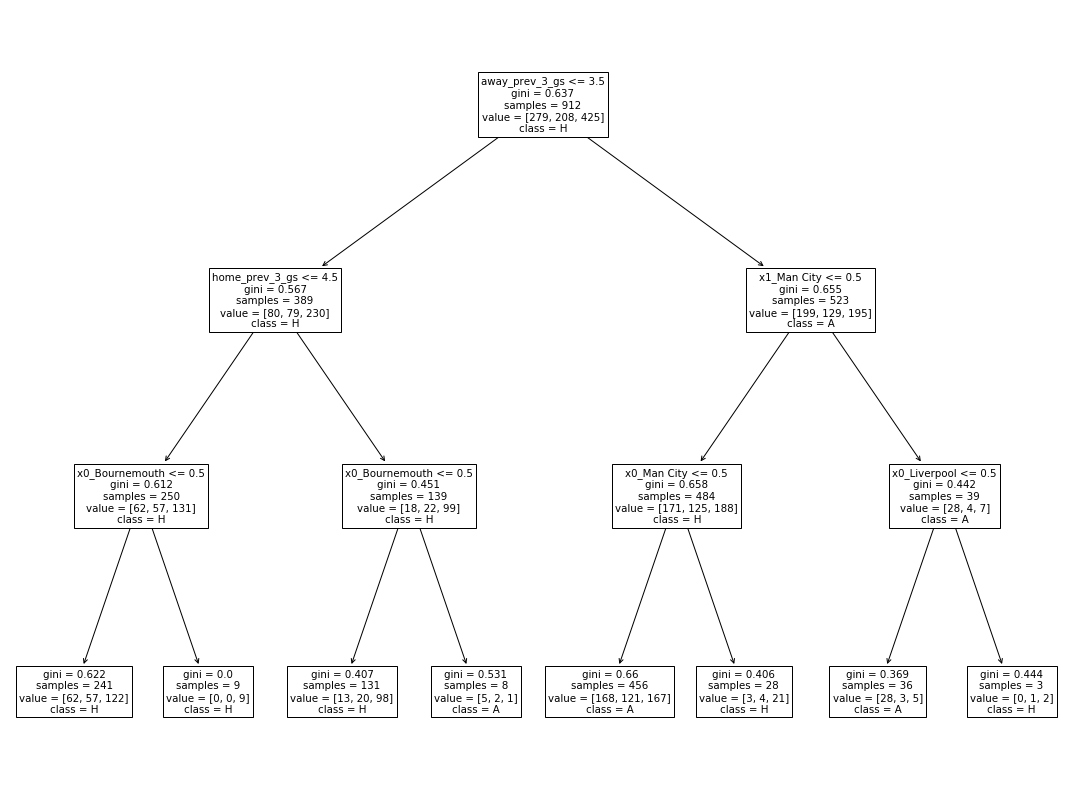

In [360]:
# Train decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_df,train_label)
plt.figure(figsize=[6.4*3,4.8*3])
tree.plot_tree(clf,feature_names=feature_df.columns,class_names=clf.classes_)
plt.show()

In [363]:
# Test decision tree classifier
clf.score(test_df,test_label)

0.4868421052631579

## Match Date Analysis

(array([198., 175., 160., 238., 152.,   0.,   0., 130., 137., 140., 380.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

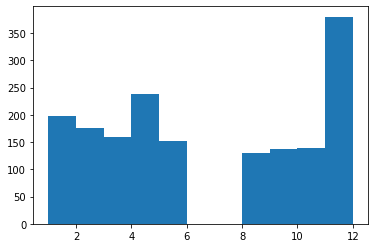

In [187]:
date_df = df
# Filter columns
RelCols = ['Date','Div']
date_df = date_df[RelCols]
# Add additonal columns
date_df.loc[:,'MatchWeekday'] = date_df.loc[:,'Date'].apply(lambda x : x.weekday())
date_df.loc[:,'MatchMonth'] = date_df.loc[:,'Date'].apply(lambda x : x.month)
date_df.loc[:,'MatchYear'] = date_df.loc[:,'Date'].apply(lambda x : x.year)
# Plot histogram
mask = date_df['MatchYear']>=2015
mask = mask.multiply(date_df['Div']=='E0')
plt.hist(date_df.loc[mask,'MatchMonth'],bins=range(1,13))